In [29]:
import sys, os, json
sys.path.append("/home/jovyan/work/mlips")

MLIPS = "/home/jovyan/work/mlips"

In [63]:
from collections import defaultdict
from typing import Tuple, List
import copy
from pathlib import Path

import data
from data import WifiFingerprint, POSI, WIFI
import make_fingerprint as mf


In [58]:
def scatter(fps, mode='region'):
    colors = ['orange','red', 'green', 'blue',  'purple',  'gray']
    x = [fp.latitude for fp in fps]
    y = [fp.longitude for fp in fps]
    if mode == 'region':
        c = [colors[fp.region%len(colors)] if fp.region is not None else 'blue' for fp in fps]
    else:
        c = [colors[fp.last_landmark%len(colors)] for fp in fps]
    import matplotlib.pyplot as plt
    plt.scatter(x,y,color=c)
    
    plt.show()

load: /home/jovyan/work/mlips/data/T03_01.txt


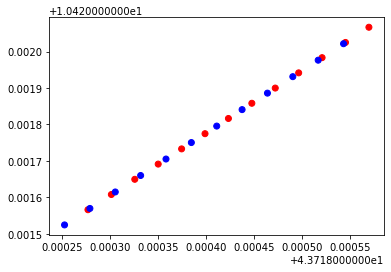

load: /home/jovyan/work/mlips/data/T03_02.txt


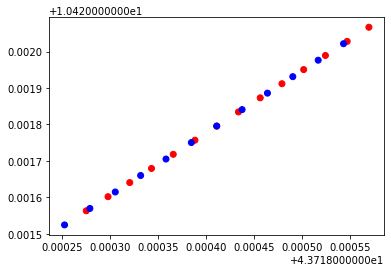

load: /home/jovyan/work/mlips/data/T03_03.txt


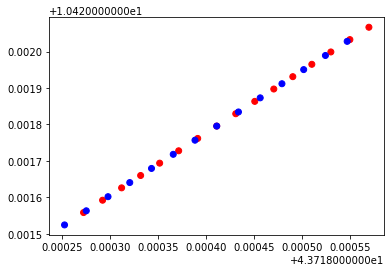

load: /home/jovyan/work/mlips/data/T03_04.txt


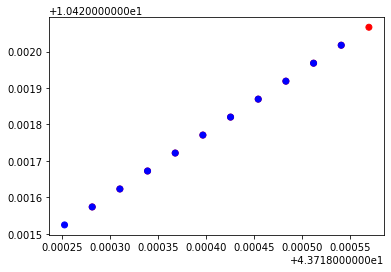

103


In [59]:
trace_log = f"{MLIPS}/data"
fps = []
for file_name in os.listdir(Path(trace_log)):
    log_file = f"{trace_log}/{file_name}"
    if log_file[-3:].lower() != "txt":
        continue

    print(f"load: {log_file}")
    fps_, posis = mf.bind_wifi_fingerprints(mf.load_logfile(log_file))
    fps_ = mf.fill_latitude_longitude(fps_, posis, exclude_landmark = [None, 2,4])
    scatter(fps_, mode='landmark')
    fps.extend(fps_)

print(len(fps))

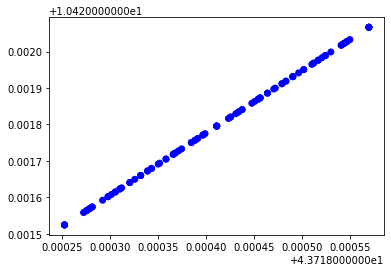

In [60]:
scatter(fps)

In [61]:
fps_new = mf.bucketization(fps)

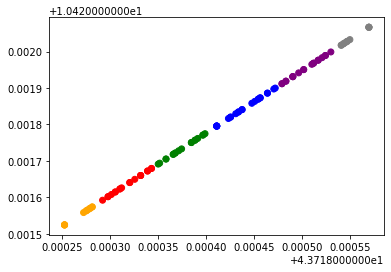

In [62]:
scatter(fps_new)

In [40]:
data.save_fingerprint_as_csv("trace2.csv", fps_new)

In [18]:
df = pd.read_csv("trace2.csv")

In [41]:
df.head()

,timestamp,region,latitude,longitude,20:19:00:00:02:79,20:19:00:00:01:51,20:19:00:00:01:33,20:19:00:00:03:49,20:19:00:00:01:40,20:19:00:00:01:25,...,20:19:00:00:01:65,20:19:00:00:01:61,20:19:00:00:04:31,20:19:00:00:02:63,20:19:00:00:01:31,20:19:00:00:00:14,20:19:00:00:02:59,20:19:00:00:01:69,20:19:00:00:01:34,20:19:00:00:03:57
0,61.472,0,43.718277,10.421566,NaN,-60.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68.396,1,43.718301,10.421608,NaN,-74.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
2,72.410,1,43.718326,10.421649,NaN,-82.0,NaN,NaN,-86.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN
3,76.387,2,43.718350,10.421691,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN
4,80.398,2,43.718375,10.421733,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-50.0,NaN,NaN,NaN,NaN


In [19]:
df.describe()

,timestamp,region,latitude,longitude,20:19:00:00:02:79,20:19:00:00:01:51,20:19:00:00:01:33,20:19:00:00:03:49,20:19:00:00:01:40,20:19:00:00:01:25,...,20:19:00:00:01:65,20:19:00:00:01:61,20:19:00:00:04:31,20:19:00:00:02:63,20:19:00:00:01:31,20:19:00:00:00:14,20:19:00:00:02:59,20:19:00:00:01:69,20:19:00:00:01:34,20:19:00:00:03:57
count,103.000000,103.000000,103.000000,103.000000,4.000000,26.000000,12.000000,6.000000,4.000000,26.000000,...,3.000000,11.000000,1.0,2.000000,17.000000,101.000000,2.000000,1.0,11.000000,37.000000
mean,126.582553,2.524272,43.718411,10.421796,-83.250000,-79.423077,-85.583333,-78.166667,-85.250000,-80.730769,...,-83.333333,-85.181818,-79.0,-79.500000,-78.294118,-60.742574,-80.000000,-76.0,-84.181818,-76.351351
std,43.881492,1.552005,0.000092,0.000158,1.258306,9.642295,3.260182,8.035339,0.957427,12.735958,...,1.527525,6.145212,NaN,4.949747,15.393849,13.893634,5.656854,NaN,2.400757,8.304002
min,59.810000,0.000000,43.718253,10.421524,-85.000000,-91.000000,-91.000000,-88.000000,-86.000000,-92.000000,...,-85.000000,-93.000000,-79.0,-83.000000,-92.000000,-87.000000,-84.000000,-76.0,-88.000000,-93.000000
25%,86.811000,1.000000,43.718332,10.421660,-83.500000,-86.000000,-88.250000,-85.250000,-86.000000,-89.000000,...,-84.000000,-90.000000,-79.0,-81.250000,-88.000000,-73.000000,-82.000000,-76.0,-86.000000,-82.000000
50%,113.787000,3.000000,43.718411,10.421796,-83.000000,-82.500000,-85.000000,-76.500000,-85.500000,-85.500000,...,-83.000000,-87.000000,-79.0,-79.500000,-85.000000,-61.000000,-80.000000,-76.0,-84.000000,-77.000000
75%,166.800000,4.000000,43.718490,10.421931,-82.750000,-75.000000,-83.000000,-71.500000,-84.750000,-80.000000,...,-82.500000,-78.500000,-79.0,-77.750000,-78.000000,-48.000000,-78.000000,-76.0,-82.500000,-71.000000
max,205.701000,5.000000,43.718569,10.422067,-82.000000,-59.000000,-81.000000,-70.000000,-84.000000,-52.000000,...,-82.000000,-76.000000,-79.0,-76.000000,-52.000000,-34.000000,-76.000000,-76.0,-80.000000,-61.000000


In [42]:
df.fillna(-100)

,timestamp,region,latitude,longitude,20:19:00:00:02:79,20:19:00:00:01:51,20:19:00:00:01:33,20:19:00:00:03:49,20:19:00:00:01:40,20:19:00:00:01:25,...,20:19:00:00:01:65,20:19:00:00:01:61,20:19:00:00:04:31,20:19:00:00:02:63,20:19:00:00:01:31,20:19:00:00:00:14,20:19:00:00:02:59,20:19:00:00:01:69,20:19:00:00:01:34,20:19:00:00:03:57
0,61.472,0,43.718277,10.421566,-100.0,-60.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,68.396,1,43.718301,10.421608,-100.0,-74.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-79.0,-100.0,-100.0,-100.0,-100.0
2,72.410,1,43.718326,10.421649,-100.0,-82.0,-100.0,-100.0,-86.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-77.0,-100.0,-100.0,-100.0,-100.0
3,76.387,2,43.718350,10.421691,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-72.0,-100.0,-100.0,-100.0,-100.0
4,80.398,2,43.718375,10.421733,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-50.0,-100.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,159.835,2,43.718368,10.421722,-100.0,-100.0,-100.0,-100.0,-100.0,-92.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-42.0,-100.0,-100.0,-100.0,-100.0
99,163.826,1,43.718339,10.421672,-100.0,-86.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-50.0,-100.0,-100.0,-100.0,-100.0
100,167.815,1,43.718310,10.421623,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-65.0,-100.0,-100.0,-100.0,-100.0
101,171.825,0,43.718282,10.421573,-100.0,-83.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-74.0,-100.0,-100.0,-100.0,-100.0
